## Project Name: "Marketing Campaign A/B Test"

**Project Goal:** To evaluate the effectiveness of different marketing strategies. Specifically, we want to measure the conversion rate of users who were exposed to different types of marketing strategies and determine if one strategy leads to a statistically significant increase in conversions.

**Metric:** Conversion rate

### Data Preparation

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [95]:
df = pd.read_csv('marketing_AB.csv')

In [96]:
# Display first few rows of the dataset
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [97]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [98]:
# Check for missing values in the dataset
df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [99]:
# Check for duplicates
df.duplicated().sum()

0

In [100]:
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0', 'user id'])

In [101]:
# Rename columns to remove spaces and use lowercase
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

### Exploratory Data Analysis

#### *Review Unique Values*

In [104]:
# Check unique values
unique_test_group = df['test_group'].unique()
unique_converted = df['converted'].unique()
unique_most_ads_day = df['most_ads_day'].unique()

# Display the unique values
print("Unique values in 'test_group':", unique_test_group)
print("Unique values in 'converted':", unique_converted)
print("Unique values in 'most_ads_day':", unique_most_ads_day)

Unique values in 'test_group': ['ad' 'psa']
Unique values in 'converted': [False  True]
Unique values in 'most_ads_day': ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']


#### *Summary Statistics*

In [107]:
# Summary statistics for total_ads and converted
summary_stats = df['total_ads'].describe()
print(summary_stats)

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total_ads, dtype: float64


#### *Data Visualization*

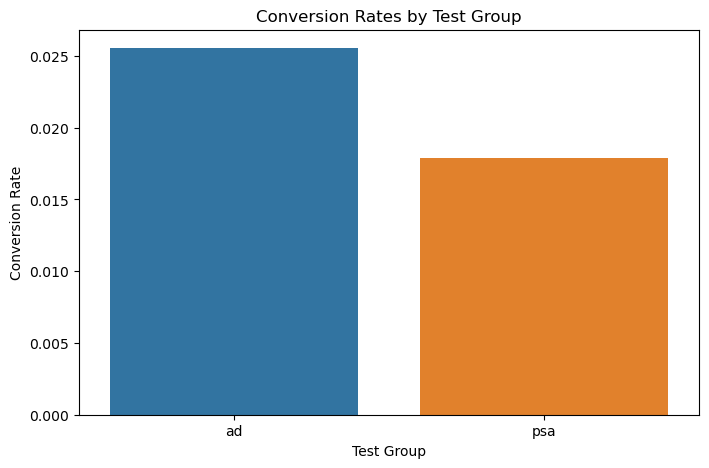

In [111]:
# Calculate conversion rates by test group
conversion_rates = df.groupby('test_group')['converted'].mean()

# Plot conversion rates by test group
plt.figure(figsize=(8, 5))
sns.barplot(x=conversion_rates.index, y=conversion_rates.values)
plt.title('Conversion Rates by Test Group')
plt.xlabel('Test Group')
plt.ylabel('Conversion Rate')
plt.show()

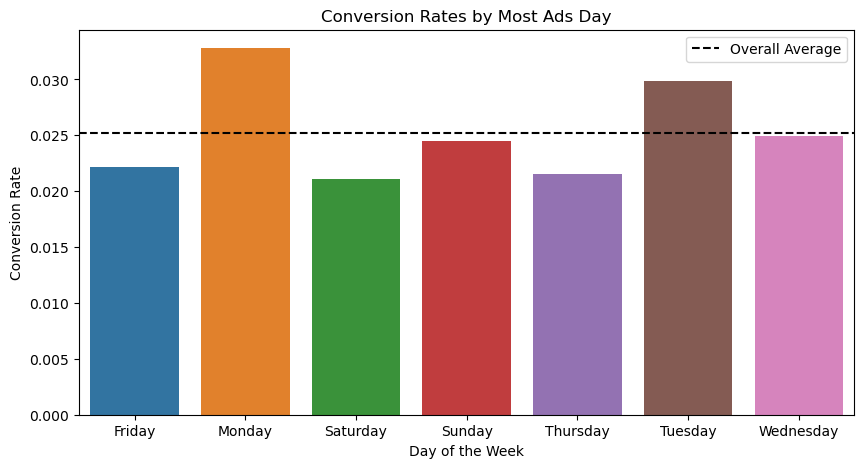

In [114]:
# Calculate conversion rates by most_ads_day
conversion_by_day = df.groupby('most_ads_day')['converted'].mean()

# Plot conversion rates by most_ads_day
plt.figure(figsize=(10, 5))
sns.barplot(x=conversion_by_day.index, y=conversion_by_day.values)
plt.axhline(df['converted'].mean(), color='black', linestyle='--', label='Overall Average')
plt.legend()
plt.title('Conversion Rates by Most Ads Day')
plt.xlabel('Day of the Week')
plt.ylabel('Conversion Rate')
plt.show()

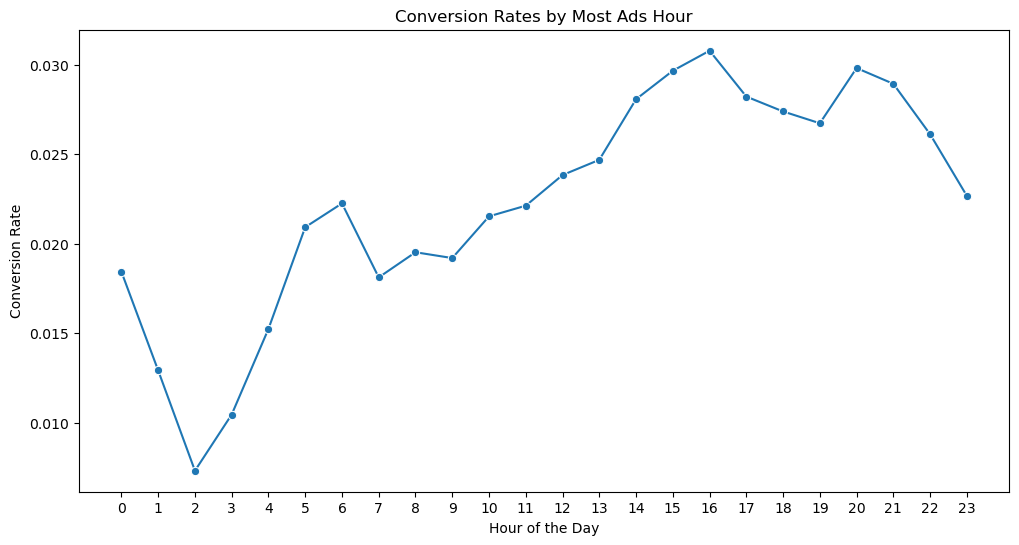

In [117]:
# Calculate conversion rates by most_ads_hour
conversion_by_hour = df.groupby('most_ads_hour')['converted'].mean()

# Plot conversion rates by most_ads_hour
plt.figure(figsize=(12, 6))
sns.lineplot(x=conversion_by_hour.index, y=conversion_by_hour.values, marker='o')
plt.title('Conversion Rates by Most Ads Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Conversion Rate')
plt.xticks(range(0, 24))
plt.show()

### Hypothesis Testing

#### *Proportions Z-Test to compare the conversion rates between the two groups*

* **Null Hypothesis:** There is no significant difference in conversion rates between the Ad and PSA groups.
* **Alternative Hypothesis:** There is a statistically significant difference in conversion rates between the Ad and PSA groups.

In [121]:
from statsmodels.stats.proportion import proportions_ztest

# Count conversions for each group
conversions_counts = df.groupby('test_group')['converted'].sum()

# Total number of users in each group
total_users = df['test_group'].value_counts()

# Perform the Z-test
z_stat, p_val = proportions_ztest(count=conversions_counts, nobs=total_users)

# Display the Z-statistic and P-value
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_val}")

# Evaluate the result based on a significance level (alpha = 0.05)
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in conversion rates between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in conversion rates between the two groups.")

Z-statistic: 7.3700781265454145
P-value: 1.7052807161559727e-13
Reject the null hypothesis: There is a statistically significant difference in conversion rates between the two groups.


#### *T-Test to compare the mean number of ads shown between the Ad and PSA groups*

* **Null Hypothesis:** The mean number of ads shown to users in the Ad group is equal to that in the PSA group.
* **Alternative Hypothesis:** The mean number of ads shown differs between the two groups.

In [126]:
from scipy.stats import ttest_ind

# Separate the data into Ad and PSA groups
ads_group = df[df['test_group'] == 'ad']['total_ads']
psa_group = df[df['test_group'] == 'psa']['total_ads']

# Perform the T-test
t_stat, p_val = ttest_ind(ads_group, psa_group, equal_var=False)

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

# Check if we can reject the null hypothesis
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the average number of ads shown between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average number of ads shown between the two groups.")

T-statistic: 0.21799691449238462
P-value: 0.8274332524963
Fail to reject the null hypothesis: There is no significant difference in the average number of ads shown between the two groups.


### Final Recommendation

Based on the Z-test results, we recommend adopting the Ad strategy as it resulted in a significantly higher conversion rate compared to the PSA strategy. Additionally, since the number of ads shown was similar between the two groups, we can confidently conclude that the content of the Ad campaign was more effective at driving conversions.